# Data Analysis
This program analyses data taken from a survey that asked subjects for their desire to kill bugs (on a scale from 0 to 10, 10 being the strongest desire to kill and 0 the weakest) of four different categories. The four different categories of bugs were differentiated by the Disgust and Fear that these bugs caused.

## Summary Statistics

In [77]:
import pandas
import matplotlib.pyplot
import statistics
import seaborn
import statsmodels.formula.api as smf

In [78]:
filepath = "bugs.csv"
df = pandas.read_csv(filepath)
summary_df = {"KillRating": [statistics.mean, statistics.median, min, max, statistics.stdev]}
grouped_df = df.groupby(["Disgust", "Fear"]).aggregate(summary_df)
print("Summary statistics of the KillRatings for each type of bug:\n\n",grouped_df)

Summary statistics of the KillRatings for each type of bug:

              KillRating                            
                   mean median  min   max     stdev
Disgust Fear                                       
high    high   7.804598    8.5  0.0  10.0  2.495760
        low    6.660920    7.5  0.0  10.0  3.151683
low     high   7.339080    8.0  0.5  10.0  2.551213
        low    5.632184    6.0  0.0  10.0  2.680094


## Linear Model
In this linear model KillRating is the outcome variable and the categories of bugs are the predictor variables.

In [79]:
formula_kill = "KillRating ~ 1 + C(Disgust) + C(Fear)"
# adding 1 in the formula is redundant, since the ordinary least squares function
# also works without it. However, I decided to keep it for the sake of clarity and 
# in case there is a program that doesn't automatically search for a constant value
# keeping the 1 in this formula makes this program more easy to implement for others.
# With the same thought I added the C() to Disgust and Fear, which communicates
# the program that the variable at hand is a categorical one. 
m_kill = smf.ols(formula_kill, data = df).fit()
print("""\n\nThe results of a linear model with kill rating as the outcome variable 
and the categories of bug as the predictor variables:\n\n""", m_kill.summary())



The results of a linear model with kill rating as the outcome variable 
and the categories of bug as the predictor variables:

                             OLS Regression Results                            
Dep. Variable:             KillRating   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     15.10
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           5.18e-07
Time:                        12:58:49   Log-Likelihood:                -841.99
No. Observations:                 348   AIC:                             1690.
Df Residuals:                     345   BIC:                             1702.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0

### further explanation of the above model
linear model: KillRating = 7.95 - 0.75 * Disgust - 1.43 * Fear (where Disgust and Fear take the value 1 if low and 0 if high) <br> model-based predictions: <br>
low, low: 7.95 - 0.75 - 1.43 = 5.77 <br>
low, high: 7.95 - 0.75 = 7.2 <br>
high, low: 7.95 - 1.43 = 6.52 <br>
high, high: 7.95 - 0 = 7.95 <br>

## Boxplots

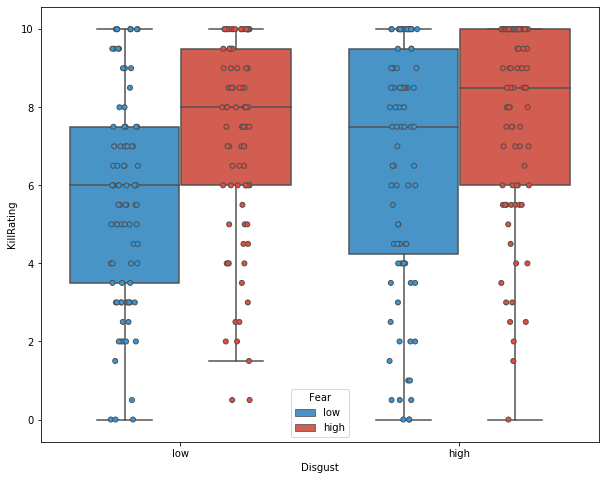

In [80]:
matplotlib.pyplot.figure(figsize=(10,8))
bp = seaborn.boxplot(x = 'Disgust', y = 'KillRating', hue = 'Fear', palette = ["#3498db", "#e74c3c"], data = df, showfliers = False)

bp = seaborn.stripplot(x = 'Disgust', y = 'KillRating', hue = 'Fear', dodge = True, palette = ["#3498db", "#e74c3c"],data = df, linewidth=1)
handles, labels = bp.get_legend_handles_labels() # get legend information from the plot object
legend = matplotlib.pyplot.legend(handles[0:2], labels[0:2], title = 'Fear', loc = 8) # specify just one legend
matplotlib.pyplot.savefig('bp.svg')
# solutions taken from seaborn documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html ; 
# https://seaborn.pydata.org/generated/seaborn.swarmplot.html and a forum: 
# https://cmdlinetips.com/2019/03/how-to-make-grouped-boxplots-in-python-with-seaborn/

In [81]:
if __name__ == '__main__':
    print('example sentence')

example sentence
